## Preprocessing data: Feature Scaling

In [1]:
# load package
import pandas as pd

In [2]:
# Load dataset
df = pd.read_csv("Social_Network_Ads.csv")
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [3]:
# Train Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df[['Age', 'EstimatedSalary']],
                                                    df['Purchased'],
                                                    test_size=0.3,
                                                    random_state=0)
X_train.shape, X_test.shape

((280, 2), (120, 2))

## Standard Scaler

*Standardize features by removing the mean and scaling to unit variance.*

In [4]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# fir scaler to train
scaler.fit(X_train)
# transform train and test
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [5]:
# Converted X_train_scaled into dataframe
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=('Scaled_Age', 'Scaled_EstimatedSalary'))
X_train_scaled_df.head()

,Scaled_Age,Scaled_EstimatedSalary
0,-1.163172,-1.584970
1,2.170181,0.930987
2,0.013305,1.220177
3,0.209385,1.075582
4,0.405465,-0.486047


## Check mean, std of scaled and non scaled

In [6]:
import numpy as np

# Concat scaled and non scaled dataframe
df_col_merged = pd.concat([X_train, X_train_scaled_df], axis=1)

# Describe 
np.round(df_col_merged.describe(), 1)

,Age,EstimatedSalary,Scaled_Age,Scaled_EstimatedSalary
count,280.0,280.0,280.0,280.0
mean,37.9,69807.1,0.0,0.0
std,10.2,34641.2,1.0,1.0
min,18.0,15000.0,-1.9,-1.6
25%,30.0,43000.0,-0.8,-0.8
50%,37.0,70500.0,-0.1,0.0
75%,46.0,88000.0,0.8,0.5
max,60.0,150000.0,2.2,2.3


*We can see the scaled column having mean 0 and std 1*

## Scatter Plot

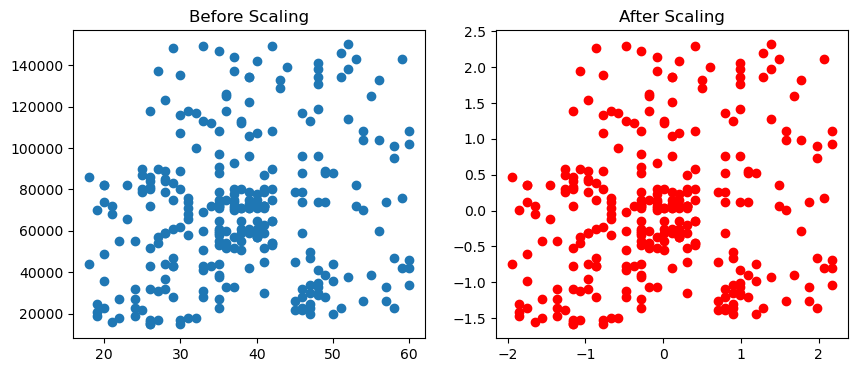

In [7]:
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 4))

ax1.scatter(X_train['Age'], X_train['EstimatedSalary'])
ax1.set_title("Before Scaling")
ax2.scatter(X_train_scaled_df['Scaled_Age'], X_train_scaled_df['Scaled_EstimatedSalary'],color='red')
ax2.set_title("After Scaling")
plt.show()

*There is no change in graph after scaling*

## Comparison of Distributions

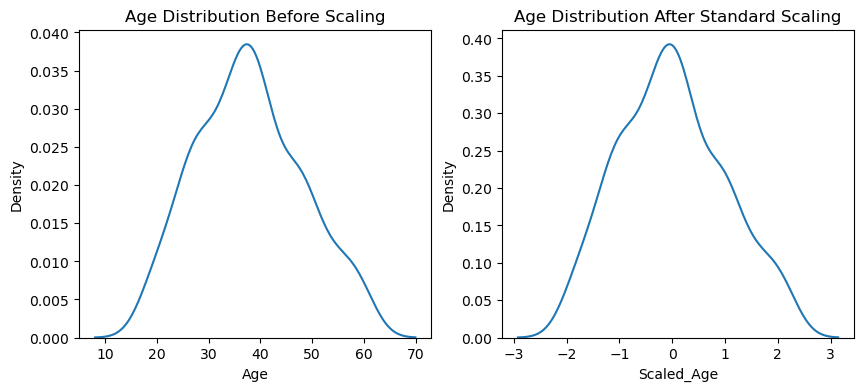

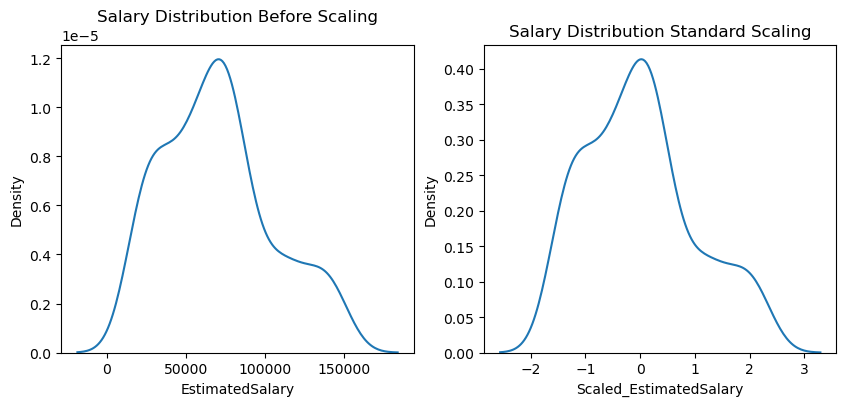

In [8]:
import seaborn as sns
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 4))

# before scaling
ax1.set_title('Age Distribution Before Scaling')
sns.kdeplot(X_train['Age'], ax=ax1)

# after scaling
ax2.set_title('Age Distribution After Standard Scaling')
sns.kdeplot(X_train_scaled_df['Scaled_Age'], ax=ax2)
plt.show()


fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 4))

# before scaling
ax1.set_title('Salary Distribution Before Scaling')
sns.kdeplot(X_train['EstimatedSalary'], ax=ax1)

# after scaling
ax2.set_title('Salary Distribution Standard Scaling')
sns.kdeplot(X_train_scaled_df['Scaled_EstimatedSalary'], ax=ax2)
plt.show()

### Model Comparision with Scaled Data

In [9]:
from sklearn.linear_model import LogisticRegression

# Fiting logistic reg on scaled and non scaled df
lr = LogisticRegression()
lr_scaled = LogisticRegression()

lr.fit(X_train,y_train)
lr_scaled.fit(X_train_scaled,y_train)

# prediction
y_pred = lr.predict(X_test)
y_pred_scaled = lr_scaled.predict(X_test_scaled)

In [10]:
from sklearn.metrics import accuracy_score
print("Actual",accuracy_score(y_test,y_pred))
print("Scaled",accuracy_score(y_test,y_pred_scaled))

Actual 0.6583333333333333
Scaled 0.8666666666666667


*Scaled data with good accuracy*

In [11]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt_scaled = DecisionTreeClassifier()

dt.fit(X_train,y_train)
dt_scaled.fit(X_train_scaled,y_train)

y_pred = dt.predict(X_test)
y_pred_scaled = dt_scaled.predict(X_test_scaled)

print("Actual",accuracy_score(y_test,y_pred))
print("Scaled",accuracy_score(y_test,y_pred_scaled))

Actual 0.875
Scaled 0.875


*No difference in Accuracy* </br>
**Which means certain ML algo(follow distance, like Euclidean etc) impact with scaled.**

### Effect of Outlier

In [12]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [13]:
# added few outliers
df = df.append(pd.DataFrame({'User ID':['12','123','1234'],
                             'Gender':['Male','Female','Male'],
                             'Age':[5,90,95],
                             'EstimatedSalary':[1000,250000,350000],
                             'Purchased':[0,1,1]}),ignore_index=True)
df.tail()

C:\Users\trilo\AppData\Local\Temp\ipykernel_10284\1570592672.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame({'User ID':['12','123','1234'],


,User ID,Gender,Age,EstimatedSalary,Purchased
398,15755018,Male,36,33000,0
399,15594041,Female,49,36000,1
400,12,Male,5,1000,0
401,123,Female,90,250000,1
402,1234,Male,95,350000,1


In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df[['Age', 'EstimatedSalary']],
                                                    df['Purchased'],
                                                    random_state=0)

X_train.shape, X_test.shape

((302, 2), (101, 2))

In [15]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# fit the scaler to the train set, it will learn the parameters
scaler.fit(X_train)

# transform train and test sets
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [16]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)

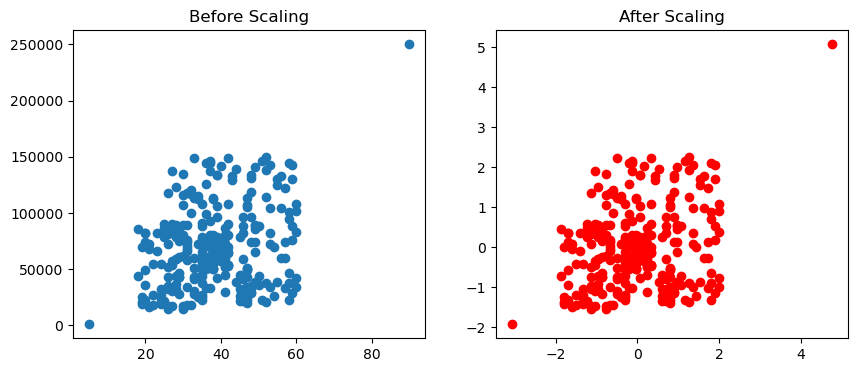

In [17]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 4))

ax1.scatter(X_train['Age'], X_train['EstimatedSalary'])
ax1.set_title("Before Scaling")
ax2.scatter(X_train_scaled['Age'], X_train_scaled['EstimatedSalary'],color='red')
ax2.set_title("After Scaling")
plt.show()

*It will impact by oulier either we are scaling or not*

## Others Algo for Normalization/ Scaling

- **Scaling data with given min and max** </br>
    - *from sklearn.preprocessing import MinMaxScaler* </br>
- **Scaling sparse data** </br>
    - *from sklearn.preprocessing import MaxAbsScaler* </br>
- **Scaling data with outliers** </br>
    - *from sklearn.preprocessing import RobustScaler*
    
[scikit learn link](https://scikit-learn.org/stable/modules/preprocessing.html)